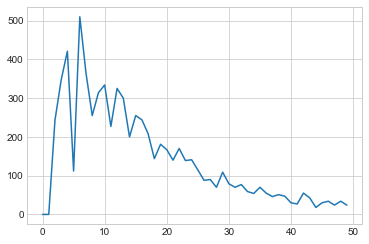

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm # recommended import according to the docs
import math
%matplotlib inline

# Function to determine whether the massart bounds are being violated.
# This is essentially True, if the difference between the trueCDF and
# empCDF is >= epsilon.

def is_viloation(F_x, F_xn, e):
    num = F_x.shape[0]
    diff = abs(F_x - F_xn)
    e = np.full(num, e)
#     print (np.greater_equal(diff,e))
    return np.greater_equal(diff,e).sum() >= 1
     
lower_support, upper_support = 0, 1
max_samples = 50
max_experiments = 1000
true_mean, true_stdev = 0.5, 0.1

# Genrator funciton of truncnorm.
truncnorm_rv = stats.truncnorm(\
               (lower_support - true_mean) / true_stdev, (upper_support - true_mean) / true_stdev, loc=true_mean, scale=true_stdev)
true_cdf = stats.norm.cdf

# Establishing epsilon.
alpha = 0.95
intermediate = - math.log((1-alpha)/2.0) /( 2.0 * N)
e = math.sqrt(intermediate)
violations = []
    
for N in range(1,max_samples+1):
    X = np.linspace(0,1,N)
    F_x = true_cdf(X, loc=true_mean, scale=true_stdev)
    counter = 0
    
    for i in range(max_experiments):
        samples = truncnorm_rv.rvs(N)
        ecdf = sm.distributions.empirical_distribution.ECDF(samples)
        F_xn = ecdf(X)
        if is_viloation(F_x, F_xn, e):
            counter+=1
        
    violations.append(counter)

# Plotting number of violations as a function of number of samples.
plt.plot(np.arange(max_samples),violations)

# Observation : For N>30 we the Masart Bounds really start to shine.

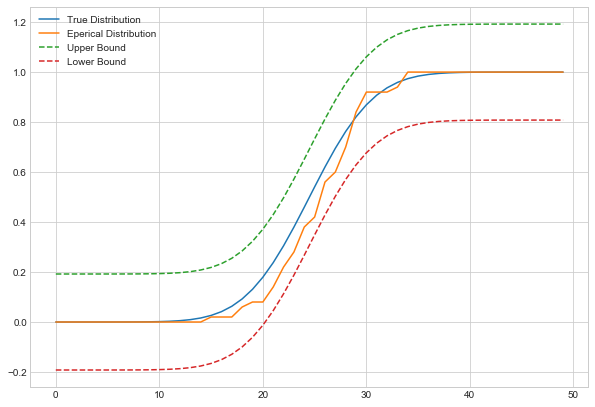

In [142]:
# Plotting bounds over the true distribution for a gausian.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm # recommended import according to the docs
import math
%matplotlib inline


# Bound for a gausian.
lower_support, upper_support = 0, 1
max_samples = 50
max_experiments = 1000
true_mean, true_stdev = 0.5, 0.1

# Establishing epsilon.
alpha = 0.95
intermediate = - math.log((1-alpha)/2.0) /( 2.0 * N)
e = math.sqrt(intermediate)
X = np.linspace(0,1,N)
true_cdf = stats.norm.cdf
F_x = true_cdf(X, loc=true_mean, scale=true_stdev)
samples = truncnorm_rv.rvs(N)
ecdf = sm.distributions.empirical_distribution.ECDF(samples)
F_xn = ecdf(X)
upper_bound=F_x+e
lower_bound=F_x-e

plt.figure(figsize=(10,7))
plt.plot(F_x, label="True Distribution")
plt.plot(F_xn, label="Eperical Distribution")
plt.plot(upper_bound, label="Upper Bound", linestyle = "--")
plt.plot(lower_bound, label="Lower Bound", linestyle = "--")
plt.legend(loc = "best")

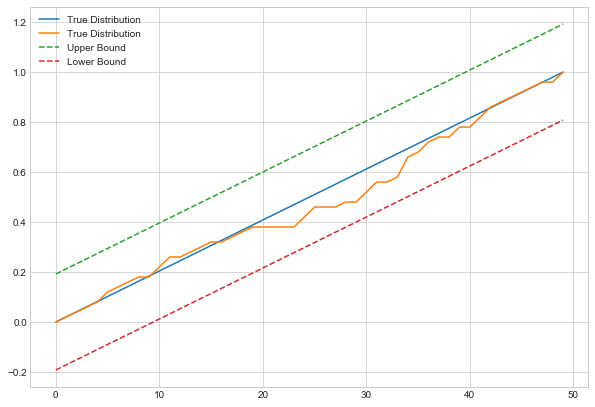

In [141]:
# Plotting bounds over the true distribution for a uniform.

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm # recommended import according to the docs
import math
%matplotlib notebook

# Bound for a gausian.
lower_support, upper_support = 0, 1
max_samples = 50
max_experiments = 1000
true_mean = 0.5
true_stdev = 1.0 / (4.0 * math.sqrt(3) )

# Establishing epsilon.
alpha = 0.95
intermediate = - math.log((1-alpha)/2.0) /( 2.0 * N)
e = math.sqrt(intermediate)
X = np.linspace(0,1,N)
Y = np.linspace(0,1,N)
# true_cdf = stats.uniform.cdf
# F_x = true_cdf(X, loc=true_mean, scale = true_stdev)
samples = np.random.uniform(lower_support, upper_support, max_samples)
ecdf = sm.distributions.empirical_distribution.ECDF(samples)
F_xn = ecdf(X)
upper_bound=Y+e
lower_bound=Y-e

plt.figure(figsize=(10,7))
plt.plot(Y, label="True Distribution")
plt.plot(F_xn, label="True Distribution")
plt.plot(upper_bound, label="Upper Bound", linestyle = "--")
plt.plot(lower_bound, label="Lower Bound", linestyle = "--")
plt.legend(loc = "best")
plt.savefig("Plots/MasartBounds/test1.png")

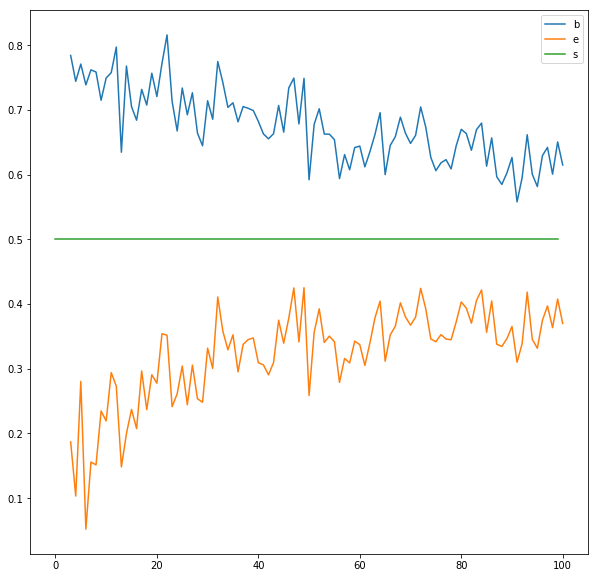

In [2]:
# Bounding the mean by Massart-Bounds. 

import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

max_samples = 100
a,b = 0,1
upper = []
lower = []

for n in range(3,max_samples+1):
    samples = np.random.uniform(a,b,n)
    order_stats = np.sort(samples)
    alpha = .95
    intermediate = math.log((1-alpha)/2.0)/(-2.0*n)
    e = math.sqrt(intermediate)
    m_l = a * e+ order_stats[0] * (1.0/n)
    m_u = order_stats[0]*max(0,(1.0/n)-e)

    for i in range(1,n):
        m_u += (max(0,(i/n)-e) - max(0,(i-1)/n - e))* order_stats[i]
        m_l += (min(1,(i/n)+e) - min(1,(i-1)/n + e))* order_stats[i]

    m_u += e*b
    upper.append(m_u)
    lower.append(m_l)
plt.figure(figsize=(10,10))
plt.plot( [i for i in range(3,max_samples+1)], upper, label='Upper Bound')
plt.plot( [i for i in range(3,max_samples+1)], lower, label='Lower Bound')
plt.plot(np.arange(max_samples), [0.5]* max_samples, label='True Mean')
plt.legend("best")